<a href="https://colab.research.google.com/github/reg4762/PembelajaranMesin_Ganjil_2024/blob/main/JobSheet9/TugasJS9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Job Sheet 9 Perceptron dan ANN
## Nama     : Regita Delya Putri
## No. Absen: 21
## NIM      : 2241720137
## Kelas    : TI-3F


---

# Persiapan Data

In [30]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [27]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255) to a range of 0 to 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Flatten the 28x28 images into vectors of size 784 (28*28)
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

# One-hot encode the labels (0-9)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'Train data shape: {X_train.shape}, Test data shape: {X_test.shape}')

Train data shape: (60000, 784), Test data shape: (10000, 784)


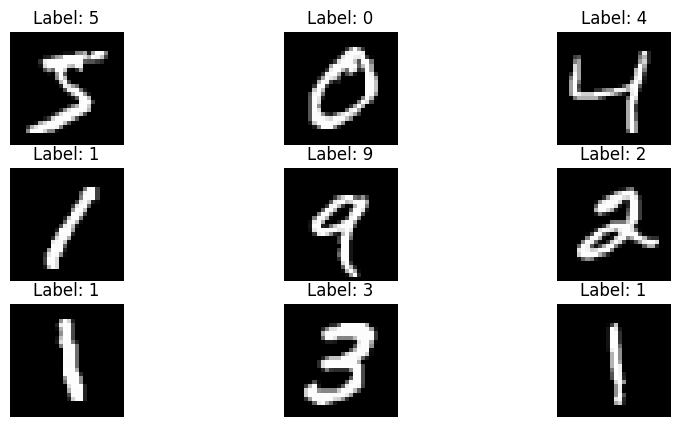

In [28]:
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for display
    plt.title(f'Label: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.show()

# Arsitektur ANN

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model configuration
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Pelatihan Model

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8110 - loss: 0.6870 - val_accuracy: 0.9462 - val_loss: 0.1933
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9520 - loss: 0.1683 - val_accuracy: 0.9532 - val_loss: 0.1569
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9634 - loss: 0.1225 - val_accuracy: 0.9642 - val_loss: 0.1203
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9726 - loss: 0.0894 - val_accuracy: 0.9691 - val_loss: 0.1021
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9810 - loss: 0.0648 - val_accuracy: 0.9693 - val_loss: 0.1018
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9853 - loss: 0.0516 - val_accuracy: 0.9727 - val_loss: 0.0907
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9878 - loss: 0.0416 - val_accuracy: 0.9709 - val_loss: 0.0980
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.

# Evaluasi Model

## Akurasi Model

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.1032
Test accuracy: 0.9743


## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


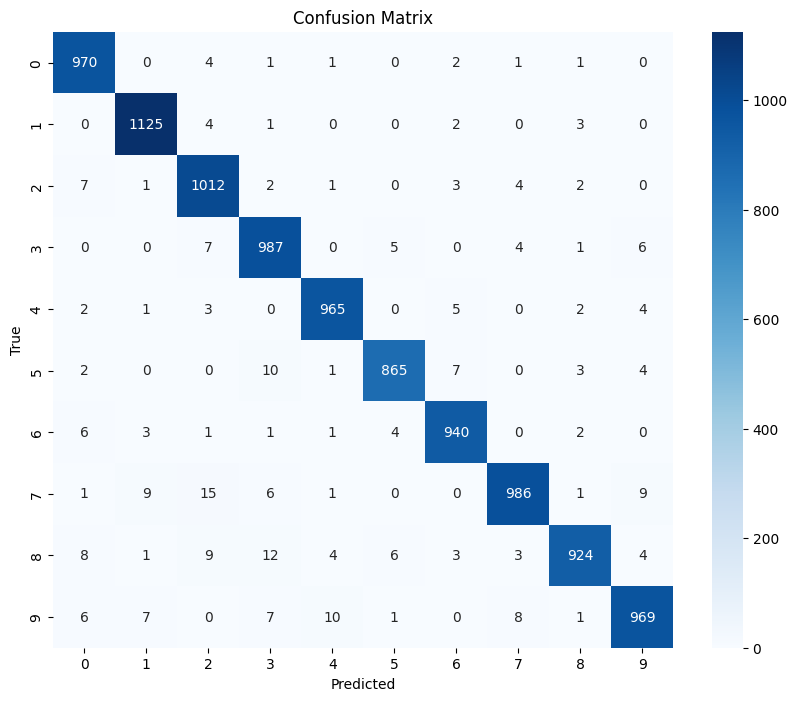

In [7]:
# Predict classes from the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
